

# Project: Medical Appointments NoShow Dataset Investiagtion

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#rq">Research Questions</a></li>
<li><a href="#ld">Loading Dataset</a></li>
<li><a href="#di">Dataset Investigation</a></li>
<li><a href="#dc">Dataset Cleaning</a></li>
<li><a href="#ed">Exploring Dataset</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

>I selected the Medical Noshow Appointment dataset because it made sense to me when i was reading it's description that all the different variables available would lead to the conclusion of whether the patient showed up or no and i believe this was going to make the part where i think of questions much easier. 

> The dataset variables are clear and can be understood just by reading their names which is also another plus for this dataset, these variables are: 'PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'

<a id='rq'></a>
# Research Questions: 

>1. Does Gender Plays a role in whether the patient status is Show/NoShow ?

>2. Does Age Plays a role in whether the patient status is Show/NoShow ?

>3. Is there a relation between Gender,Age and having a long term disease that might affect the status of NoShow/Show ?

>4. Does Alcoholism affect the status if Show or NoShow ?

>5. Does Having a Scholarship from the goverment encourage the patient to show up for their appointments ?

>6. Which neighbourhood regions actually have higher appointments with physicians?

>7. If a patient is handicapped, does that affect their status of showing up or not ?

In [116]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime 
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

<a id='ld'></a>
# Loading Dataset

In [117]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='di'></a>
# Dataset Investigation

In [118]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The max value in Handicap is 4 which maybe an outlier and also the min value in Age is -1 which might be an outlier as well.

In [119]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

Some of the Column Names are spelled Incorrectly which is something we have to deal with in the cleaning process

In [120]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

## Types of Variables

### String

Gender , ScheduledDay, AppointmentDay , Neighbourhood, No-show

### Numerical

PatientId, AppointmentID, Age, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received


In [121]:
df[['ScheduledDay','AppointmentDay']].head(5)

,ScheduledDay,AppointmentDay
0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z
1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z
2,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z
3,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z
4,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z


ScheduledDay and AppointmentDay will be converted to datetime64[ns] in the cleaning stage

In [122]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There are no missing values in this dataset

In [123]:
df['SMS_received'].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [124]:
df['Diabetes'].value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

In [125]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

Looking at sum value counts before proceeding to the cleaning stage

In [126]:
print("the unique values for 'Gender' are {}".format(df.Gender.unique()))
print("the unique values for 'Age' are {}".format(sorted(df.Age.unique())))
print("the unique values for 'Neighbourhood' are {}".format(df.Neighbourhood.unique()))
print("the unique values for 'Scholarship' are {}".format(df.Scholarship.unique()))
print("the unique values for 'Hypertension' are {}".format(df.Hipertension.unique()))
print("the unique values for 'Diabetes' are {}".format(df.Diabetes.unique()))
print("the unique values for 'Alcoholism' are {}".format(df.Alcoholism.unique()))
print("the unique values for 'Handicap' are {}".format(df.Handcap.unique()))
print("the unique values for 'SMS_received' are {}".format(df.SMS_received.unique()))
print("the unique values for 'NoShow' are {}".format(df["No-show"].unique()))

the unique values for 'Gender' are ['F' 'M']
the unique values for 'Age' are [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
the unique values for 'Neighbourhood' are ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA

A value for Age available is -1 which will be considered as an outlier and all the rows with this value will be dropped, as for the values bigger than 100, they will not be dropped as they can happen unlike the negative values

Rows with values of Handicap that are 2,3,4 will also be dropped as it is assumed that '0' maps to 'No' and '1' maps to 'Yes' which means that these values doesn't make much sense

<a id='dc'></a>
# Dataset Cleaning 

In [127]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.rename(columns = {'Hipertension' : 'Hypertension', 'Handcap':'Handicap', 'No-show' : 'NoShow'}, inplace = True)
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


The Spelling Mistakes has been resolved successfully

In [128]:
df.query('Age < 0').count()

PatientId         1
AppointmentID     1
Gender            1
ScheduledDay      1
AppointmentDay    1
Age               1
Neighbourhood     1
Scholarship       1
Hypertension      1
Diabetes          1
Alcoholism        1
Handicap          1
SMS_received      1
NoShow            1
dtype: int64

1 record have an Age < 0 which will be considered as an outlier and will be removed

In [129]:
df.drop(df[(df.Age < 0)].index, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null float64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null object
AppointmentDay    110526 non-null object
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hypertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handicap          110526 non-null int64
SMS_received      110526 non-null int64
NoShow            110526 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


One entry has been dropped from the dataset

In [130]:
df.query('Handicap > 1').count()

PatientId         199
AppointmentID     199
Gender            199
ScheduledDay      199
AppointmentDay    199
Age               199
Neighbourhood     199
Scholarship       199
Hypertension      199
Diabetes          199
Alcoholism        199
Handicap          199
SMS_received      199
NoShow            199
dtype: int64

199 records have a Handicap > 1 which will be considered as outliers and will be removed

In [131]:
df.drop(df[(df.Handicap > 1)].index, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110327 non-null float64
AppointmentID     110327 non-null int64
Gender            110327 non-null object
ScheduledDay      110327 non-null object
AppointmentDay    110327 non-null object
Age               110327 non-null int64
Neighbourhood     110327 non-null object
Scholarship       110327 non-null int64
Hypertension      110327 non-null int64
Diabetes          110327 non-null int64
Alcoholism        110327 non-null int64
Handicap          110327 non-null int64
SMS_received      110327 non-null int64
NoShow            110327 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


199 entries has been dropped from the dataset

<a id='ed'></a>
# Exploring Dataset

## Univariate Analysis

In this section we are going to explore each variable on its own before moving to multivariate analysis and begin to answer some of our research questions.

### Caterogical Variables

In [132]:
df['NoShow'].value_counts()


No     88049
Yes    22278
Name: NoShow, dtype: int64

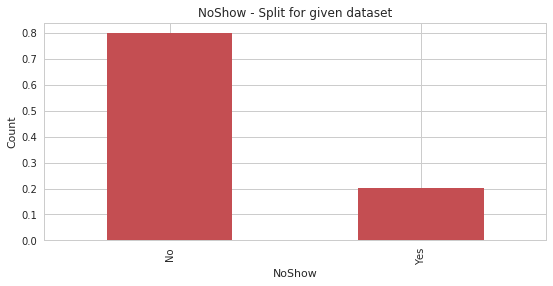

In [133]:
df['NoShow'].value_counts(normalize=True).plot.bar(figsize = (9,4), title = 'NoShow - Split for given dataset', color = 'r')
plt.xlabel('NoShow')
plt.ylabel('Count');

The patient records or instances who do not show up on scheduled time are of 22,312 (around 20%) and who show up are 88,168(around 80%) out of total 110,327.

The NoShow variable here can be called the predictor variable as all the other variables affect the prediction of this variable that's why it will be used alot in the multivariate analysis.

Now lets take a look at some of the other variables anaylysis to understand them even more as they will be needed to answer our reserach questions

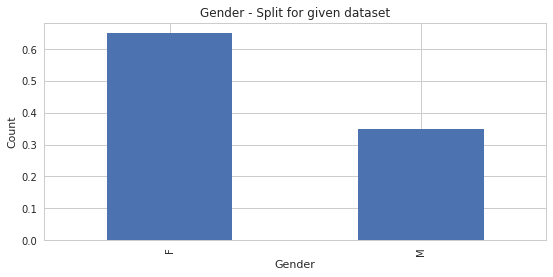

In [134]:
df['Gender'].value_counts(normalize=True).plot.bar(figsize = (9,4), title = 'Gender - Split for given dataset', color = 'b')
plt.xlabel('Gender')
plt.ylabel('Count');

Most of our patients are female patients.

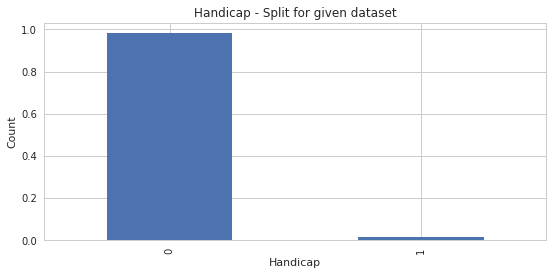

In [135]:
df['Handicap'].value_counts(normalize=True).plot.bar(figsize = (9,4), title = 'Handicap - Split for given dataset', color = 'b')
plt.xlabel('Handicap')
plt.ylabel('Count');

Most of our patients are not handicapped which might prove hard to answer question 7 in our analysis

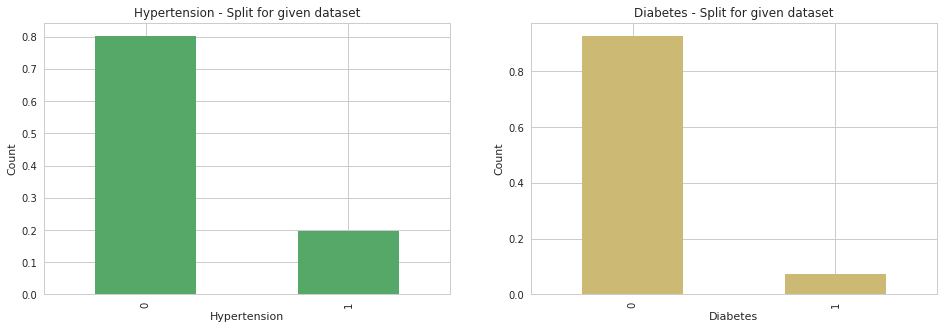

In [136]:
plot1 = plt.figure(1)
plt.subplot(121)
df['Hypertension'].value_counts(normalize=True).plot.bar(figsize = (16,5), title = 'Hypertension - Split for given dataset', color = 'g')
plt.xlabel('Hypertension')
plt.ylabel('Count');

plt.subplot(122)
df['Diabetes'].value_counts(normalize=True).plot.bar(figsize = (16,5), title = 'Diabetes - Split for given dataset', color = 'y')
plt.xlabel('Diabetes')
plt.ylabel('Count');

plt.show()

The above two graphs shows the percentage for each longterm disease that we have

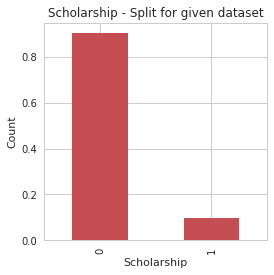

In [137]:
df['Scholarship'].value_counts(normalize=True).plot.bar(figsize = (4,4), title = 'Scholarship - Split for given dataset', color = 'r')
plt.xlabel('Scholarship')
plt.ylabel('Count');

This helps us to know the percentage of scholarships patients available 

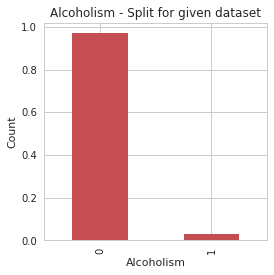

In [138]:
df['Alcoholism'].value_counts(normalize=True).plot.bar(figsize = (4,4), title = 'Alcoholism - Split for given dataset', color = 'r')
plt.xlabel('Alcoholism')
plt.ylabel('Count');

This helps us to know the percentage of patients that are alcoholic

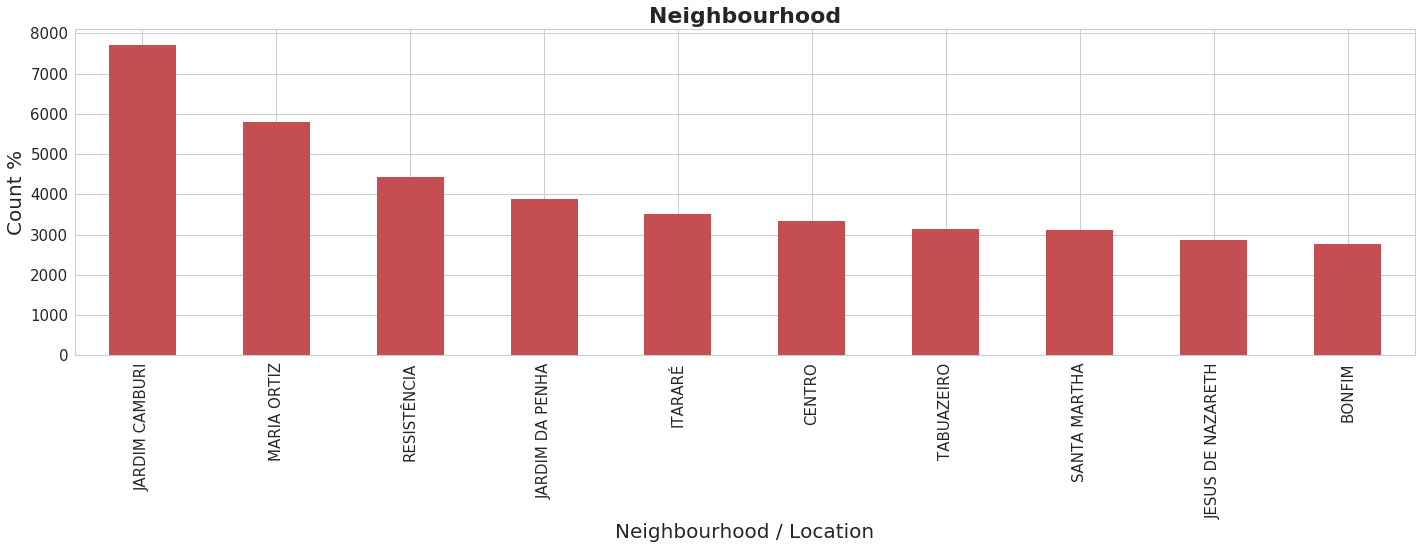

In [114]:
df['Neighbourhood'].value_counts().sort_values(ascending = False)[:10].plot.bar(figsize=(24,6), fontsize = 15.0, color = 'r')
plt.title('Neighbourhood', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)
plt.xlabel('Neighbourhood / Location', fontsize = 20.0)
plt.show()

Most of our patients come from the JARDIM CAMBURI neighbourhood but in the next section we will see which neighbourhood's patients shows up the most

### Numerical Values

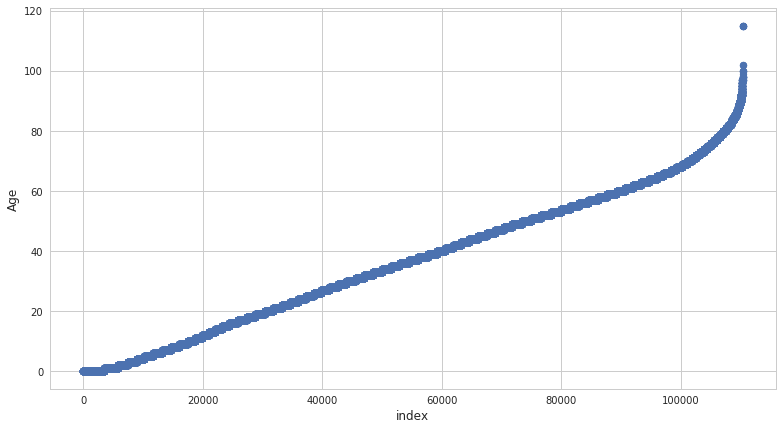

In [115]:
plt.figure(figsize=(13,7))
plt.scatter(range(df.shape[0]), np.sort(df.Age.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()

The above graph shows the age distribution which has no values below 0 and some values above 100

<a id='aq'></a>
## Answering Questions

## Multivariate Analysis

Here we will use multivariate analysis to start answering our research questions

### 1. Does Gender Play a role in whether the patient status is Show/NoShow ?

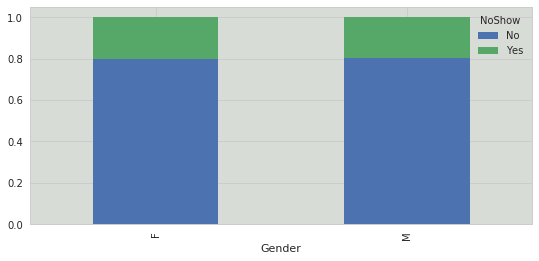

In [63]:
fig, ax = plt.subplots()
Gender=pd.crosstab(df['Gender'],df['NoShow'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(9,4),  ax = ax);
ax.set_facecolor('#d8dcd6')

Gender does not really affect the status of showing or not showing

### 2. Does Age Play a role in whether the patient status is Show/NoShow ?

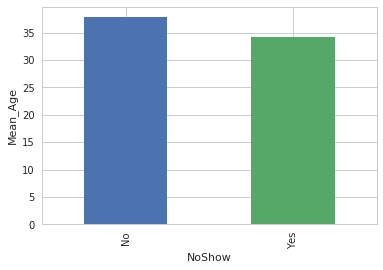

In [64]:
fig, ax = plt.subplots()
df.groupby('NoShow')['Age'].mean().plot.bar()
plt.ylabel('Mean_Age');

The mean age group of patients with "NoShow = Yes" have lesser age

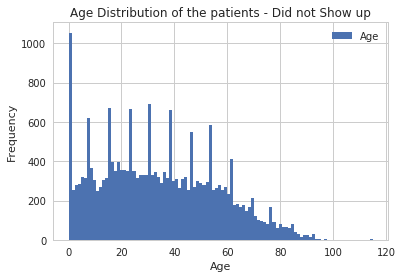

In [75]:
df_NoShow = df[df['NoShow']  == "Yes"]
df_NoShow.plot(kind = "hist",y = "Age",bins = 100, color = 'b') 
plt.title('Age Distribution of the patients - Did not Show up')
plt.xlabel('Age');

Most of the Patients that did not show up are in the age group of 20-40, which makes sense as in most cases the need of a doctor increases as we grow older which is shown clearly in the 60-80 and the 80-100 group

### 3. Is there a relation between Gender, Age and having a long term disease that might affect the status of NoShow/Show ?

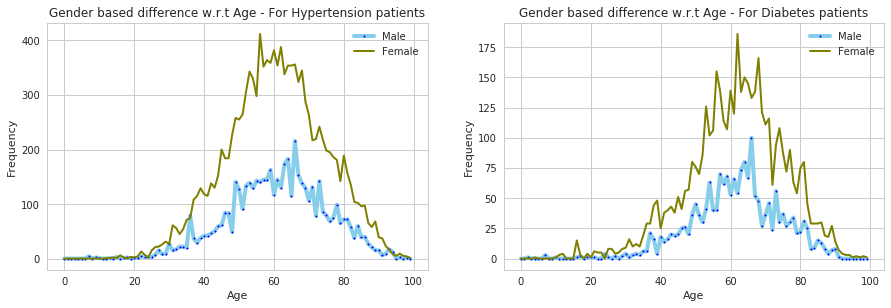

In [76]:
plt.figure(1)
plt.figure(figsize = (15,10))
iter_cols = ['Hypertension', 'Diabetes']
for col in iter_cols: 
    plt.subplot(int(str(22)+str((iter_cols.index(col)+1))))
    range_df = pd.DataFrame()
    range_df['Age'] = range(100) # Setting up for the age limit of 100 only
    Male_Hyper = range_df.Age.apply(lambda x:len(df[(df.Age == x) & (df.Gender == 'M') & (df[col] == 1) & (df.NoShow == 'No') ]))
    Female_Hyper = range_df.Age.apply(lambda x:len(df[(df.Age == x) & (df.Gender == 'F') & (df[col] == 1)& (df.NoShow == 'No')]))

    # multiple line plot
    plt.plot( range_df, Male_Hyper, marker='o', markerfacecolor='blue', markersize=2, color='skyblue', linewidth=4)
    plt.plot( range_df, Female_Hyper, marker='', color='olive', linewidth=2)

    plt.legend(['Male','Female'])
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    # plt.figsize=(20,10)
    plt.title('Gender based difference w.r.t Age - For {} patients'.format(col));

Hypertension and Diabetes patients are attending the doctor with NoShow status = "No" are from the similar age ranges from 40 to 80 - with females conversion better than Males

### 4. Does Alcoholism affect the status if Show or NoShow ?

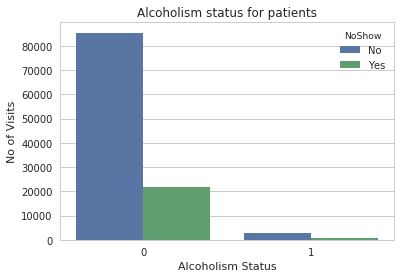

In [77]:
Alcoholism = sns.countplot(x = 'Alcoholism', hue = 'NoShow', data = df)
Alcoholism.set_title('Alcoholism status for patients')
plt.xlabel('Alcoholism Status')
plt.ylabel('No of Visits')
plt.show()

We can observe that being alcoholic doesn't really make much difference in the status of NoShow/Show

### 5. Does Having a Scholarship from the goverment encourage the patient to show up for their appointments ?

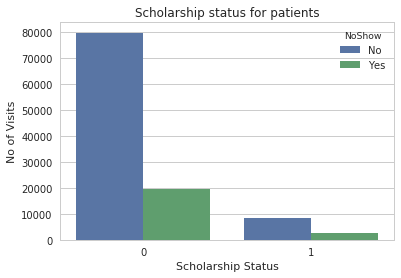

In [78]:
Scholarship= sns.countplot(x = 'Scholarship', hue = 'NoShow', data = df)
Scholarship.set_title('Scholarship status for patients')
plt.xlabel('Scholarship Status')
plt.ylabel('No of Visits')
plt.show()

We would expect that patients with a scholarship would attend as it's free of charge but it seems that almost a quarter of patients with scholarship did not show up

### 6. Which neighbourhood regions actually have higher appointments with physicians?

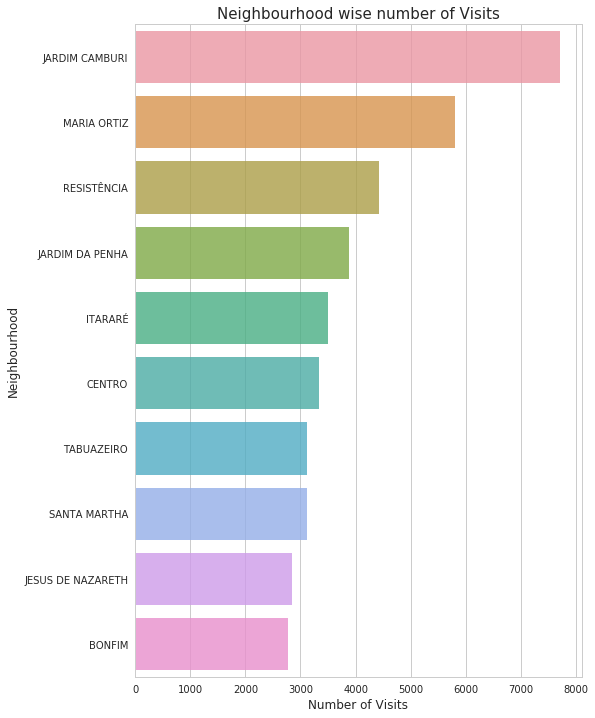

In [79]:
# Top 10 Neighbourhood values based on the Visits
cnt_srs = df['Neighbourhood'].value_counts().head(10)
plt.figure(figsize=(8,12))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Number of Visits', fontsize=12)
plt.ylabel('Neighbourhood', fontsize=12)
plt.title("Neighbourhood wise number of Visits", fontsize=15)
plt.show()

We can observe here that the number of visits are more from the area - Jardim Camburi

### 7. If a patient is handicapped, does that affect their status of showing up or not ?

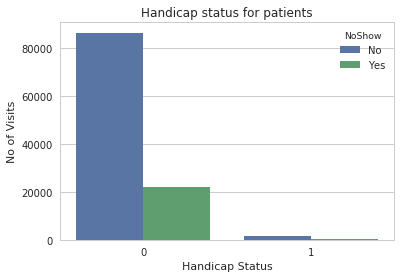

In [80]:
Handicap= sns.countplot(x = 'Handicap', hue = 'NoShow', data = df)
Handicap.set_title('Handicap status for patients')
plt.xlabel('Handicap Status')
plt.ylabel('No of Visits')
plt.show()

As expected here the number of handicapped patients are very low that we cannot assume a truth based on its relation with the status of NoShow/Show

## Limitations

1. The data contained only April, May and June data - If there are complete full year data on monthly basis, we can would've been able to get more powerful investigations
2. If we know the actual patient population from a particular neighborhood, then we can get a reason on why majority of the patients are coming from Jardim Camburi.

<a id='conclusions'></a>
# Conclusions

1. Gender doesn't really affect the probability of a patient showing up or not

2. Majority of Patients that shows up for appointments are the ones older than 40. Where the age groups of 40-60 and 60-80 have a high percentage of showing up

3. Hypertension and Diabetes patients are attending the doctor when compared to other medications. Age ranges from 40 to 80 - with females conversion is better than Males.

4. Being alcoholic doesn't really make much difference in the status of NoShow/Show.

5. On contrary actually we would expect that patients who have got scholarship should have been all attended the physician but it seems that ~25% of patients did not attend.

6. Majority of the visits happend from Jardim Camburi, but we are not sure on why this happend. There might be many reasons like majority of the patient population might be from that place or majority of the physicians are from that location. This is one of the limitations.

7. After careful analysis of different variables, if we were to choose one that affects status of NoShow or Show the most we would choose Age

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])